Zomato Data Analysis

In [2]:
!pip install seaborn
!pip install matplotlib

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


Step 1 : Importing Libraries

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Step 2 : Creating data frames

In [22]:
zomato_data = pd.read_csv(r"C:\Users\Rutuja Sutar\Downloads\Zomato data .csv")
print(zomato_data)

                      name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            8

In [9]:
zomato_data

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


convert data type of col - rate

In [12]:
def handleRate(value):
    value = str(value).split('/')
    value = value[0];
    return float(value)

zomato_data['rate'] = zomato_data['rate'].apply(handleRate)

In [14]:
zomato_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


Type of resturant

In [15]:
zomato_data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0.5, 0, 'types of resturant')

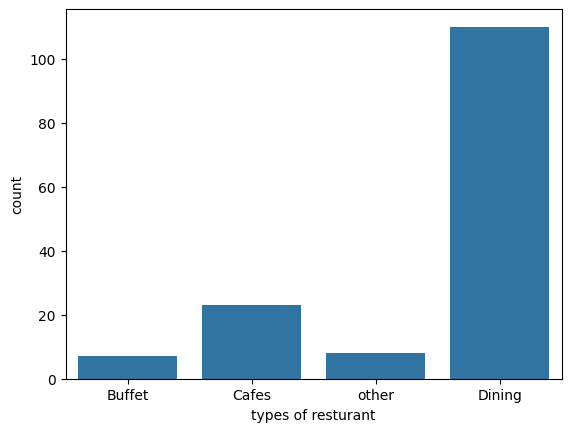

In [17]:
sns.countplot(x=zomato_data['listed_in(type)'])
plt.xlabel("types of resturant")

conclusion : majority of resturant falls in dinning category

In [18]:
zomato_data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


Text(0, 0.5, 'votes')

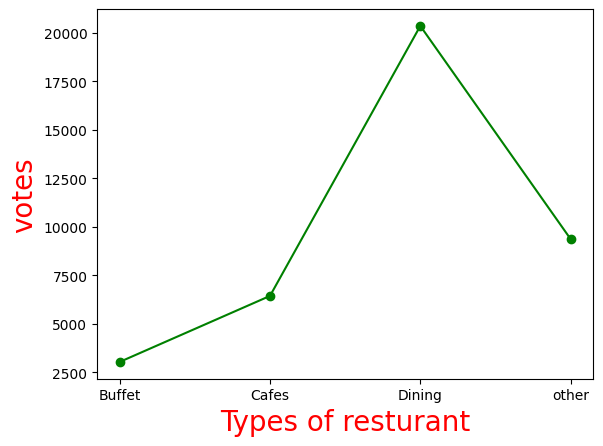

In [24]:
grouped_data = zomato_data.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, c='green', marker = "o")
plt.xlabel("Types of resturant", c="red", size = 20)
plt.ylabel("votes", c="red", size=20)

Conclusion : dinning resturant has recieved maximum votes

In [25]:
zomato_data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


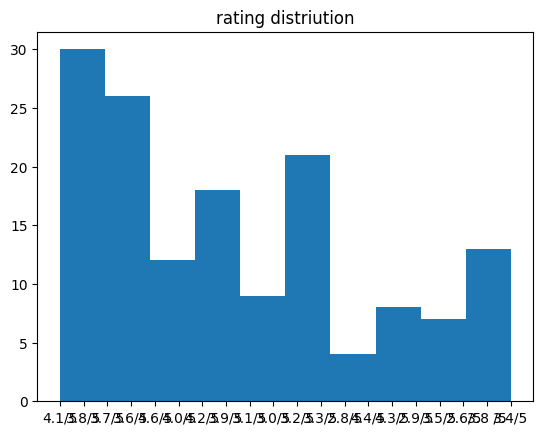

In [27]:
plt.hist(zomato_data['rate'],bins = 10)
plt.title("rating distriution")
plt.show()

conclusion : majority resturant received rating from 3.5 to 4

Average orders spending by couples

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

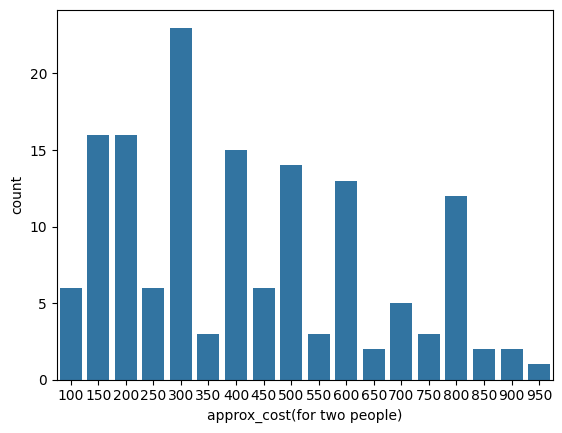

In [28]:
couple_data=zomato_data['approx_cost(for two people)']
sns.countplot(x=couple_data)

conclusion: majority of couple prefer with an approximate cost of 300

which mode receives maxi rating

In [29]:
zomato_data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


<Axes: xlabel='online_order', ylabel='rate'>

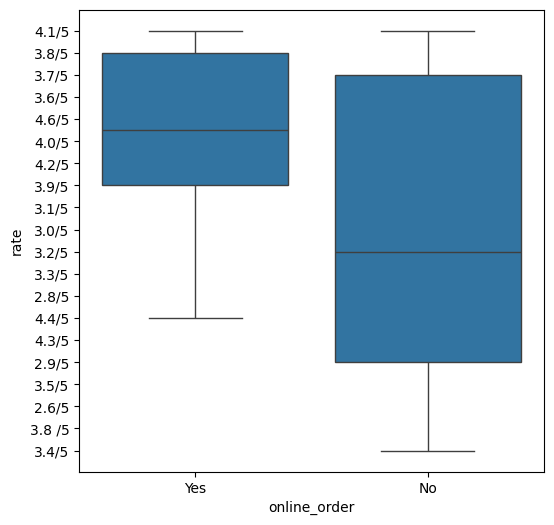

In [30]:
plt.figure(figsize = (6,6))
sns.boxplot(x = 'online_order', y= 'rate', data = zomato_data)

conclusion : offline order received lower rating in comparision to online

In [31]:
zomato_data.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


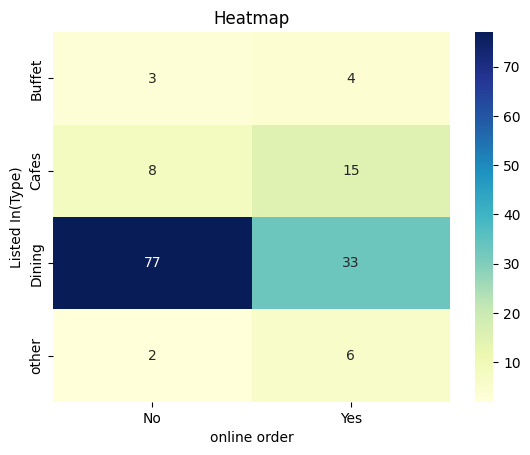

In [37]:
pivot_table = zomato_data.pivot_table(index = 'listed_in(type)', columns = 'online_order', aggfunc = 'size', fill_value =0)
sns.heatmap(pivot_table, annot=True, cmap ="YlGnBu", fmt='d')
plt.title("Heatmap")
plt.xlabel("online order")
plt.ylabel("Listed In(Type)")
plt.show()

conclusion : dinning resturant primarily accepts offline orders, whereas cafes primirily receives online orders. this suggest that clients prefer ordes in person at resturant, ut prefer online at cafes